# Day 1


## part 1

/Users/danramirez/MBS


([<matplotlib.axis.YTick at 0x1331ad590>,
 [Text(0, 0, 'Andorra'),
  Text(0, 1, 'Austria'),
  Text(0, 2, 'Belgium'),
  Text(0, 3, 'Denmark'),
  Text(0, 4, 'Finland'),
  Text(0, 5, 'France'),
  Text(0, 6, 'Germany'),
  Text(0, 7, 'Italy'),
  Text(0, 8, 'Ireland'),
  Text(0, 9, 'Greece')])

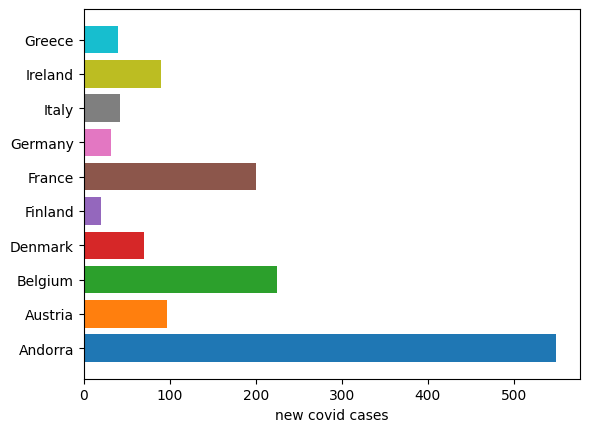

In [75]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl

# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/covid02", "covid.xlsx")
df = pd.read_excel(file,index_col='date')
df.describe()

x=np.arange(0,df.loc['2020-10-01'].shape[0])
y=df.loc['2020-10-01',:].values
colormap=plt.cm.tab10(x)
plt.barh(x,y,align='center',color=colormap)
plt.xlabel('new covid cases')
plt.yticks(x,df.columns)
#plt.xticks(x,df.columns,rotation=90)



## part 2 Buying and Selling singals

/Users/danramirez/MBS
             High         Low        Open       Close        Volume  \
count  377.000000  377.000000  377.000000  377.000000  3.770000e+02   
mean    60.439993   59.119271   59.696843   59.844967  1.321042e+08   
std     14.079134   13.662097   13.836151   13.911545  6.264213e+07   
min     36.430000   35.500000   35.994999   35.547501  4.544800e+07   
25%     49.814999   48.802502   49.112499   49.294998  8.992760e+07   
50%     56.145000   55.092499   55.764999   55.897499  1.144260e+08   
75%     71.610001   69.987503   70.570000   71.107498  1.477512e+08   
max     93.095001   90.567497   91.250000   91.632500  4.265100e+08   

        Adj Close  
count  377.000000  
mean    58.919096  
std     14.000658  
min     34.559078  
25%     48.315205  
50%     54.994621  
75%     70.335510  
max     90.883034  


/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_80163/3152298189.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['close_short'][i] > df['close_long'][i]:
/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_80163/3152298189.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['close_short'][i] < df['close_long'][i]:
/var/folders/ft/dwmcjbnd0b35z5n9yksp4jfh0000gn/T/ipykernel_80163/3152298189.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acc

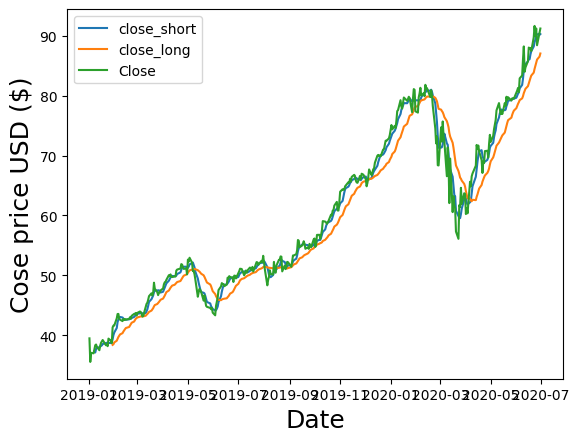

In [7]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl

short, long= 5 ,20

# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/01-stock", "appl.xlsx")
df = pd.read_excel(file,index_col='Date')
print(df.describe())

df['close_short']=df['Close'].rolling(window=short).mean()
df['close_long']=df['Close'].rolling(window=long).mean()

x5=df['close_short']
x20=df['close_long']
close=df['Close']

plt.plot(x5, label='close_short')
plt.plot(x20, label='close_long')
plt.plot(close, label='Close')
plt.legend()
plt.xlabel('Date',fontsize=18)
plt.ylabel('Cose price USD ($)',fontsize=18)

# Define function to calculate buy/sell signals
def longfx(df):
    status = 0
    pricebuy = []
    pricesell = []
    profit = []
    transdays = []
    temp_buyprice = []
    temp_buyindex = []

    for i in range(len(df) - 1):
        if df['close_short'][i] > df['close_long'][i]:
            if status != 1:
                status = 1
                pricebuy.append(df['Open'][i + 1])
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
                temp_buyprice.append(df['Open'][i + 1])
                temp_buyindex.append(i + 1)
            else:
                pricebuy.append(np.nan)
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
        
        elif df['close_short'][i] < df['close_long'][i]:
            if status != 0:
                status = 0
                pricebuy.append(np.nan)
                pricesell.append(df['Open'][i + 1])
                profit.append(df['Open'][i + 1] - temp_buyprice[-1])
                transdays.append(i + 1 - temp_buyindex[-1])
            else:
                pricebuy.append(np.nan)
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
        else:
            pricebuy.append(np.nan)
            pricesell.append(np.nan)
            profit.append(np.nan)
            transdays.append(np.nan)

    pricebuy.append(np.nan)
    pricesell.append(np.nan)
    profit.append(np.nan)
    transdays.append(np.nan)

    return pricebuy, pricesell, profit, transdays
# Adding new columns to the DataFrame

df['pricebuy'], df['pricesell'], df['profit'], df['transdays'] = longfx(df)


# Now you can save the DataFrame with the new columns
df.to_excel(current_directory+'/02-output/stock.xlsx', index=True)
